<a href="https://colab.research.google.com/github/Madhan-sukumar/Deep-Learning/blob/main/FeedForward_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 - **torch** - torch is the main module that holds all the things you need for Tensor computation.
 - **torch.nn and torch.nn.functional** - The torch.nn module provides many classes and functions to build neural networks. Can think of it as the fundamental building blocks of neural networks: models, all kinds of layers, activation functions, parameter classes, etc. It allows us to build the model like putting some LEGO set together.

 - **torch.optim** - torch.optim offers all the optimizers like SGD, ADAM, etc., so don’t have to write it from scratch.

 - **torchvision** - torchvision contains a lot of popular datasets, model architectures, and common image transformations for computer vision. We get our MNIST dataset from it and also use its transforms.

- **SummaryWriter (Tensor Board)** - SummaryWriter enables PyTorch to generate the report for Tensor Board. We’ll use Tensor Board to look at our training data, compare results and gain intuition. 



**About the Dataset:**

The MNIST dataset, also known as the Modified National Institute of Standards and Technology dataset, consists of 60,000 small square 28×28 grayscale images of handwritten digits between 0 to 9 divided into ten different classes. This dataset is mainly used for text classification using deep learning models.

To create a Feed-Forward classification model on the MNIST dataset,

 1. Use DataLoader module from Pytorch to load our dataset and Transform It
 2. We will implement Neural Net, with input, hidden & output Layer
 3. Apply Activation Functions 
 4. Set up the Loss & Optimizer and implement a Training Loop that can use batch training
 5. Finally, evaluate the model and calculate our accuracy. 

In [ ]:
# imorting dependencies
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

We will first define our hyperparameters for our neural network; we are setting our input size to 784 as we know that our dataset contains images of the size 28×28 and flatten this into a one-dimensional array. 

In [ ]:
#hyperparameters tuning
input_size = 784 #28x28px input size 
hidden_size = 100
num_classess = 10 # output size or number of classes from 0 to 9
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
# Importing the dataset from MNIST
#converting the data to tensor using transform
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,
                                           transform = transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False,
                                           transform = transforms.ToTensor())


100%|██████████| 9912422/9912422 [00:00<00:00, 159370850.47it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 75239561.38it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36500477.09it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13875111.99it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Data Loaders
train_loaders = DataLoader(dataset= train_dataset, batch_size = batch_size,shuffle = True)
test_loaders = DataLoader(dataset= test_dataset, batch_size = batch_size,shuffle = False)

In [ ]:
# to see 
examples= iter(train_loaders)
samples, labels = next(examples)
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


It shows, we having 100 batches of images and the colour channel is 1, its size is 28x28

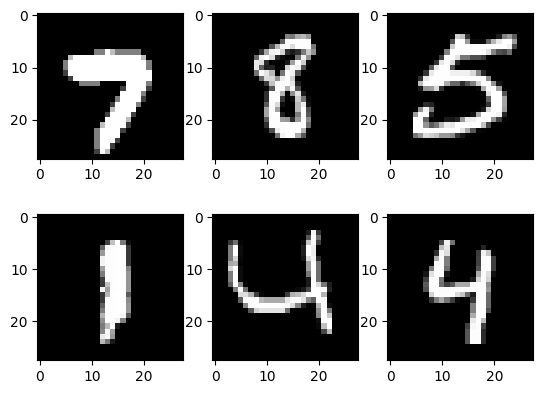

In [ ]:
# viewing the sample data
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')
plt.show()

# FULLY CONNECTED NN

Creating a Fully connected neural network with one hidden layer. We will not be not using the Softmax function here as cross-entropy loss implemented further will apply it automatically. 

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classess):
    super(NeuralNet, self).__init__()
    #creatin linear layer
    self.l1 = nn.Linear(input_size,hidden_size) 
    #applying activation function
    self.relu = nn.ReLU()
    #linear layer at end
    self.l2 = nn.Linear(hidden_size,num_classess)

  #defining forward, x will get the sample as input
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model =NeuralNet(input_size,hidden_size,num_classess)

# LOSS FUNCTIONS AND OPTIMISER 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr= learning_rate)

# TRAINING LOOP

In [ ]:
# Train the model
n_total_steps = len(train_loaders)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loaders):  # i -index
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784 as 1d]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device) #pushing the images to GPU to get GPU support
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.4681
Epoch [1/2], Step [200/600], Loss: 0.3681
Epoch [1/2], Step [300/600], Loss: 0.2163
Epoch [1/2], Step [400/600], Loss: 0.2302
Epoch [1/2], Step [500/600], Loss: 0.1957
Epoch [1/2], Step [600/600], Loss: 0.1385
Epoch [2/2], Step [100/600], Loss: 0.1436
Epoch [2/2], Step [200/600], Loss: 0.2121
Epoch [2/2], Step [300/600], Loss: 0.1390
Epoch [2/2], Step [400/600], Loss: 0.1511
Epoch [2/2], Step [500/600], Loss: 0.3441
Epoch [2/2], Step [600/600], Loss: 0.2230


# TESTING

In [ ]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loaders:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        #prediction
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1) # 1 to return index 1
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.19 %
